In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/surveys.csv', index_col='record_id')

In [3]:
small_dataset = df[:50]
plot_data = small_dataset['plot']

In [9]:
plt.plot(plot_data, label = 'My Data')

In [10]:
plt.show()

In [6]:
plt.savefig('pyplot.png') #auto saves and .png

In [7]:
plt.savefig('myplot.pdf')

In [12]:
%matplotlib inline

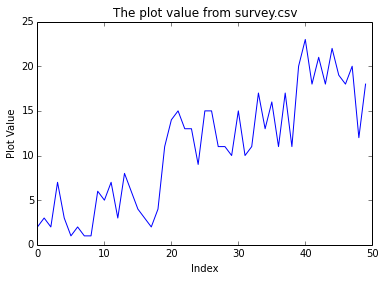

In [14]:
plt.plot(plot_data)
plt.xlabel('Index')
plt.ylabel('Plot Value')
plt.title('The plot value from survey.csv')

In [ ]:
http://matplotlib.org/gallery.html
http://wiki.scipy.org/Cookbook/Matplotlib

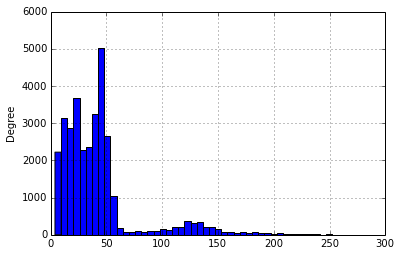

In [17]:
#you can also directly plot in pandas!

df.wgt.plot(kind='hist', bins=50)

In [65]:
df_sex_plot_comparison=pd.DataFrame(columns=['M','F'])
df_sex_plot_comparison['M']=df[df.sex=='M'].groupby('plot').mean().wgt
df_sex_plot_comparison['F']=df[df.sex=='F'].groupby('plot').mean().wgt

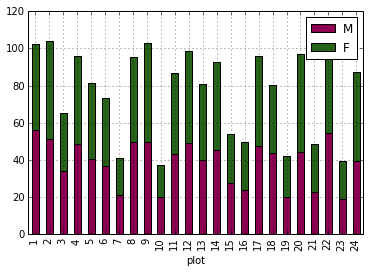

In [68]:
df_sex_plot_comparison.plot(kind='bar', stacked=True, colormap=plt.cm.PiYG)

## What if we wanted to look at mean weights across plots and years. 

## we need to reshape!  



In [177]:
df_means_year_plot=df.groupby(['plot','year']).mean()
df_means_year_plot

month        day        wgt
plot year                                 
1    1977   9.909091  13.681818  37.800000
     1978   6.655172   9.379310  84.145455
     1979   6.222222  24.370370  76.360000
     1980   5.533333  15.200000  75.690141
     1981   4.898734   9.873418  79.858974
     1982   6.422018  22.036697  63.057143
     1983   5.876923  15.330769  63.751938
     1984   6.294118  17.078431  49.312500
     1985   5.529412  18.941176  66.438776
     1986   7.561404  10.578947  77.872727
     1987   6.693878  18.234694  70.217391
     1988   6.652174  14.318841  59.415385
     1989   5.775000   6.862500  40.219178
     1990   6.146667  19.226667  45.694444
     1991   6.433735  12.204819  45.315789
     1992   4.737705  14.327869  44.189655
     1993   6.344828  17.586207  44.260870
     1994   6.852941   6.970588  39.066667
     1995   6.945205  18.109589  35.985915
     1996   6.410526  18.915789  33.361702
     1997   6.076389  15.701389  36.986111
     1998   6.424658  20.068493  36.730159
     1999   5.732143  13.178571  42.910714
     2000   6.339286  15.857143  32.256881
     2001   7.253012  20.843373  44.512500
     2002   7.158333  12.516667  36.864407
2    1977  10.200000  13.250000  39.200000
     1978   5.500000   9.173913  61.397436
     1979   5.931818  24.227273  56.840909
     1980   5.087912  14.659341  53.367816
...              ...        ...        ...
23   1997   6.166667  16.055556  17.083333
     1998   7.687500  21.000000  20.333333
     1999   5.666667  13.250000  22.000000
     2000   6.166667  17.083333   9.500000
     2001   8.411765  18.705882  17.400000
     2002   7.285714  13.619048  21.555556
24   1979   9.733333  21.200000  60.066667
     1980   5.117647  16.323529  65.552239
     1981   6.767123  16.684932  56.154930
     1982   6.021053  23.589474  47.923913
     1983   5.895833  15.302083  45.250000
     1984   6.188679  18.056604  55.058824
     1985   6.300000  17.383333  40.272727
     1986   7.439024   7.975610  41.250000
     1987   6.594595  23.378378  49.897059
     1988   5.702128  15.531915  50.951220
     1989   5.187500   7.208333  41.906977
     1990   5.608696  19.304348  20.000000
     1991   7.630435  11.086957  21.547619
     1992   6.192308  14.961538  20.090909
     1993   7.043478  17.521739  22.277778
     1994   6.733333  10.866667  20.000000
     1995   7.791667  15.833333  21.565217
     1996   6.000000  19.074074  17.869565
     1997   6.828125  16.828125  29.934426
     1998   6.558824  20.235294  36.903226
     1999   6.846154  11.538462  46.090909
     2000   6.290323  13.129032  28.160000
     2001   7.807692  19.653846  73.045455
     2002   8.269231  12.153846  58.227273

[622 rows x 3 columns]

In [178]:
df_year_plot_square=df_means_year_plot.reset_index().pivot('plot','year')['wgt']
df_year_plot_square.max().max()

<matplotlib.colorbar.Colorbar instance at 0x12e3db200>

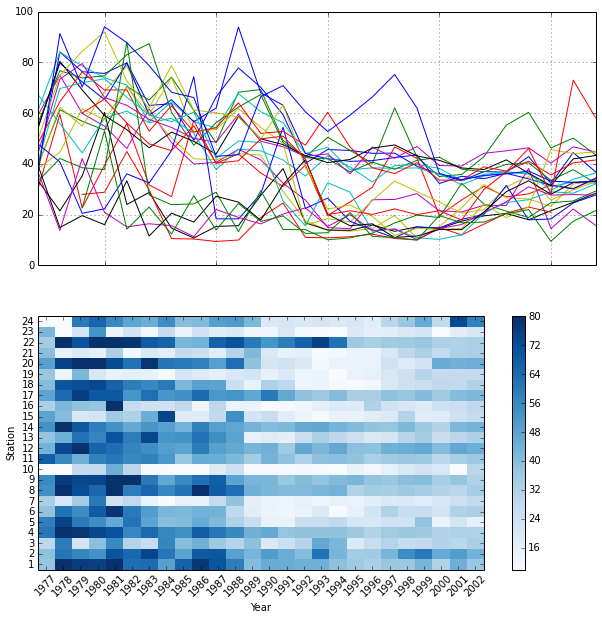

In [209]:
###Build slowly!

fig,ax=plt.subplots(2, figsize=(10,10))
ax1=ax[0]
ax2=ax[1]

df_year_plot_square.T.plot(ax=ax1, legend=False)

hmap=ax2.pcolor(df_year_plot_square, vmin=10, vmax=80,
                cmap=plt.cm.Blues)
ax2.margins(0,0)
ax2.set_yticks(np.arange(0.5, len(df_year_plot_square.index), 1))
ax2.set_xticks(np.arange(0.5, len(df_year_plot_square.columns), 1))
ax2.set_yticklabels(df_year_plot_square.index)
ax2.set_xticklabels(df_year_plot_square.columns, rotation=45)
ax2.set_xlabel('Year')
ax2.set_ylabel('Station')
plt.colorbar(hmap, orientation="vertical")


In [186]:
help (plt.pcolor)

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    .. note::
    
        pcolor can be very slow for large arrays; consider
        using the similar but much faster
        :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Call signatures::
    
      pcolor(C, **kwargs)
      pcolor(X, Y, C, **kwargs)
    
    *C* is the array of color values.
    
    *X* and *Y*, if given, specify the (*x*, *y*) coordinates of
    the colored quadrilaterals; the quadrilateral for C[i,j] has
    corners at::
    
      (X[i,   j],   Y[i,   j]),
      (X[i,   j+1], Y[i,   j+1]),
      (X[i+1, j],   Y[i+1, j]),
      (X[i+1, j+1], Y[i+1, j+1]).
    
    Ideally the dimensions of *X* and *Y* should be one greater
    than those of *C*; if the dimensions are the same, then the
    last row and column of *C* will be ignored.
    
    Note that the the column index corresponds to the
    *x*-coordinate, and the row in

http://matplotlib.org/gallery.html
    
http://nbviewer.ipython.org/